In [1]:
import pandas as pd

# Example DataFrame
df = pd.read_csv('/content/aqi.csv', encoding='latin1')

In [13]:
df[['Date', 'Time', 'Extra']] = df['Date & Time'].str.split(' ', expand=True)

print(df['Time'].head())

0    16:00
1    16:15
2    16:30
3    16:45
4    17:00
Name: Time, dtype: object


In [2]:
df.shape

(2817, 23)

In [14]:
df1=df.dropna()
df1.shape

(1728, 26)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-6-85bbc9725bfc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  myplot = sns.distplot(df['AQI'], kde=False, hist=True, bins=15, hist_kws=dict(edgecolor="k", linewidth=2), color='Purple')


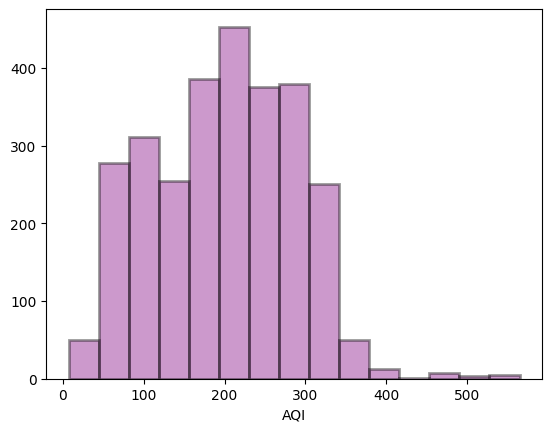

In [6]:
myplot = sns.distplot(df['AQI'], kde=False, hist=True, bins=15, hist_kws=dict(edgecolor="k", linewidth=2), color='Purple')

<ipython-input-7-ec5dd6362192>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  myplot = sns.distplot(df['AQI'], kde=True, hist=True, bins=15, hist_kws=dict(edgecolor="k", linewidth=2))


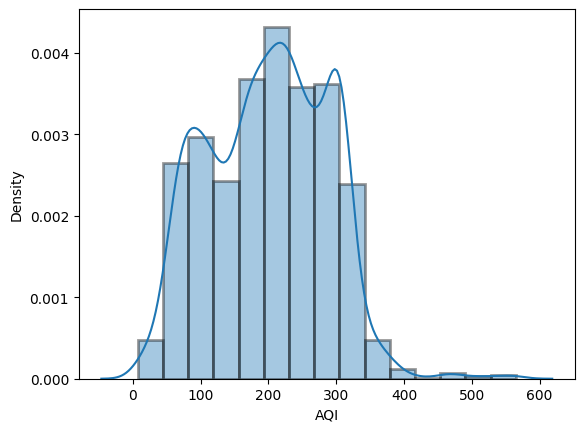

In [7]:
myplot = sns.distplot(df['AQI'], kde=True, hist=True, bins=15, hist_kws=dict(edgecolor="k", linewidth=2))

In [15]:
average_aqi_by_date = df.groupby('Date')['AQI'].mean()
df['average_aqi_by_date'] = df['Date'].map(average_aqi_by_date)


In [16]:
df.dropna(subset=['AQI'], inplace=True)

In [17]:
df['average_aqi_by_date']

0       243.3125
1       243.3125
2       243.3125
3       243.3125
4       243.3125
          ...   
2812    137.6250
2813    137.6250
2814    137.6250
2815    137.6250
2816    221.0000
Name: average_aqi_by_date, Length: 2817, dtype: float64

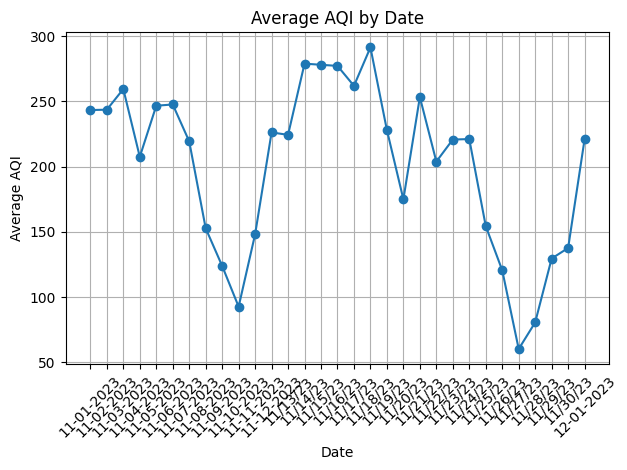

In [18]:
plt.plot(average_aqi_by_date.index, average_aqi_by_date.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.title('Average AQI by Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [19]:
average_aqi_by_time = df.groupby('Time')['AQI'].mean()
df['average_aqi_by_time'] = df['Time'].map(average_aqi_by_time)

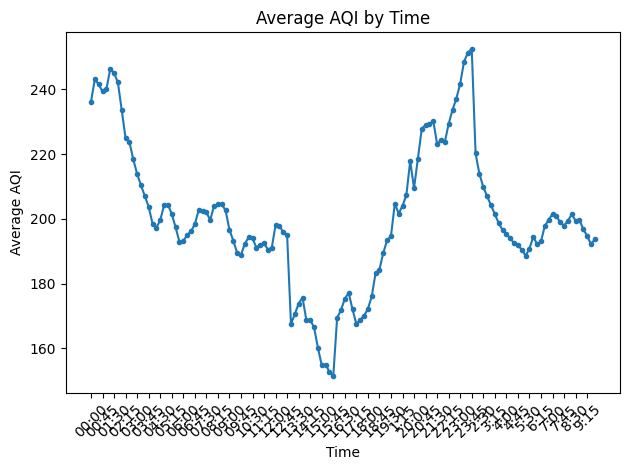

In [20]:
plt.plot(average_aqi_by_time.index, average_aqi_by_time.values, marker='.')
plt.xlabel('Time')
plt.ylabel('Average AQI')
plt.title('Average AQI by Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xticks(plt.xticks()[0][::round(len(average_aqi_by_date)/10)], rotation=45)
plt.grid(False)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()